<a href="https://colab.research.google.com/github/GIGAParviz/pneumonia-chest-prediction-with-CNN/blob/main/pneumonia_chest_x_ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Download the Dataset**

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d lasaljaywardena/pneumonia-chest-x-ray-dataset

100% 1.14G/1.14G [00:17<00:00, 86.6MB/s]
100% 1.14G/1.14G [00:17<00:00, 68.5MB/s]


In [ ]:
! unzip pneumonia-chest-x-ray-dataset.zip -d train

# **Import Important Libraries**

In [ ]:
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D , Flatten , MaxPooling2D , Dense , Dropout , Input , Concatenate , AveragePooling2D
from keras.models import Model
import matplotlib.pyplot as plt

# **Importing trainign data and data preprocessing**








In [ ]:
data = keras.utils.image_dataset_from_directory('train/train' , batch_size=52 , image_size=(256,256))

Found 5216 files belonging to 2 classes.


In [ ]:
data = data.map(lambda x,y : (x/255 , y))
batch = data.as_numpy_iterator().next()

In [ ]:
batch[0].min()

0.0

In [ ]:
batch[0].max()

1.0

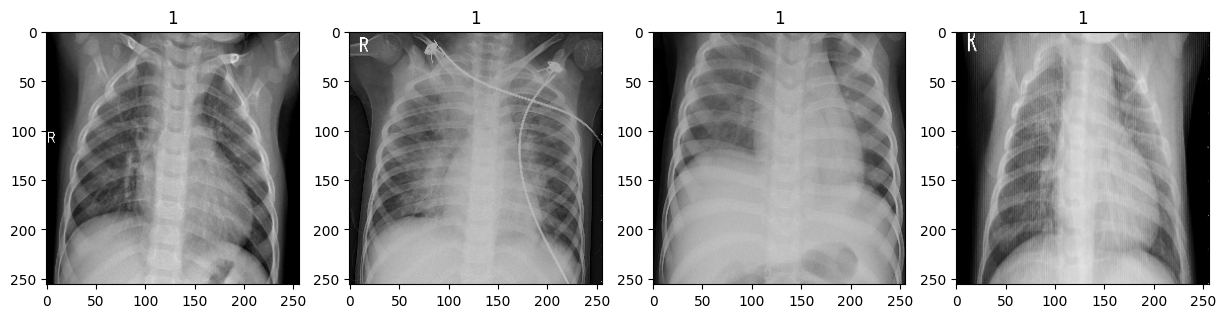

In [ ]:
fig , ax = plt.subplots(ncols=4 ,figsize=(15,15))

for inx , img in enumerate(batch[0][:4]):
  ax[inx].imshow(img)
  ax[inx].title.set_text(batch[1][inx])
plt.show()

In [ ]:
test = keras.utils.image_dataset_from_directory('train/test' , image_size=(256,256) , batch_size=52)

Found 624 files belonging to 2 classes.


In [ ]:
test = test.map(lambda x,y:(x/255 , y))

In [ ]:
batch2 = test.as_numpy_iterator().next()

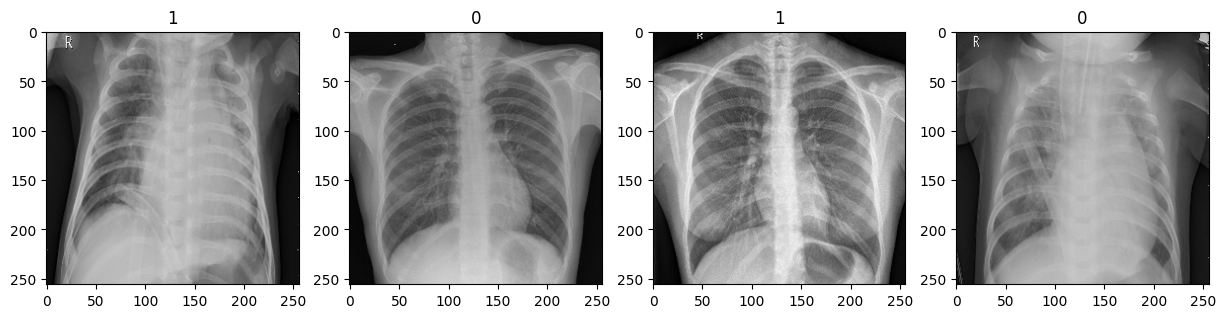

In [ ]:
fig , ax = plt.subplots(ncols=4 ,figsize=(15,15))

for inx , img in enumerate(batch2[0][4:8]):
  ax[inx].imshow(img)
  ax[inx].title.set_text(batch2[1][inx])
plt.show()

In [ ]:
val= keras.utils.image_dataset_from_directory('train/val' , batch_size=52 , image_size=(256 , 256))

Found 16 files belonging to 2 classes.


In [ ]:
val = val.map(lambda x,y:(x/255 , y))

In [ ]:
batch3 = val.as_numpy_iterator().next()

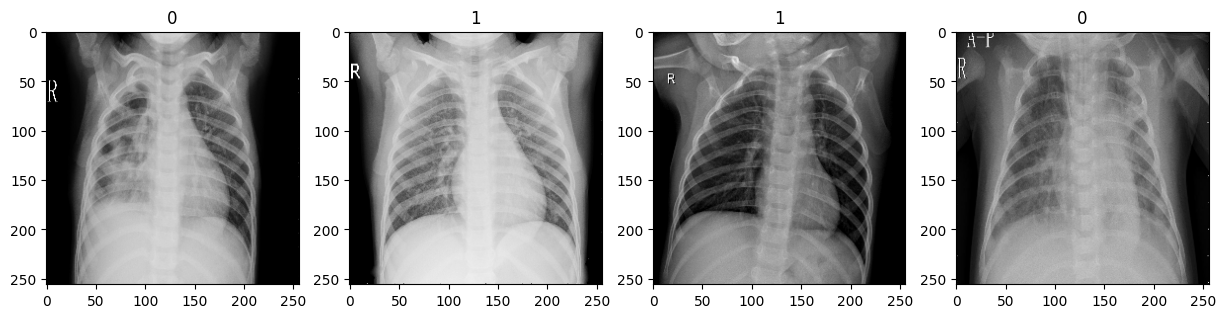

In [ ]:
fig , ax = plt.subplots(ncols=4 ,figsize=(15,15))

for inx , img in enumerate(batch3[0][4:8]):
  ax[inx].imshow(img)
  ax[inx].title.set_text(batch3[1][inx])
plt.show()

In [ ]:
from keras import layers

# **Creating convoluntional Neural Network API**

In [ ]:
input = Input(shape=(256,256,3))
layer1 = Conv2D(256 , (4,4) , strides=(2,2) , activation='relu')(input)
layer2 = MaxPooling2D(2)(layer1)
layer3 = Conv2D(256 , (4,4) , strides=(2,2) , padding='valid' , activation='relu')(layer2)
layer4 = MaxPooling2D(2)(layer3)
layer5 = Conv2D(150 , (4,4) , strides=(2,2) , padding='valid' , activation='relu')(layer4)
layer6 = Conv2D(100 , (4,4) , strides=(2,2) , padding='valid' , activation='relu')(layer5)
layer7 = AveragePooling2D(2)(layer6)
flat = Flatten()(layer7)
layer8 = Dense(250 , activation='relu')(flat)
layer9 = Dense(150 , activation='relu')(layer8)
layer10 = Dense(100 , activation='relu')(layer9)
concate = Concatenate()([layer10 , layer8])
output = Dense(1 , activation='sigmoid')(concate)

model = Model(inputs=(input) , outputs=(output))

In [ ]:
model.output

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_3')>

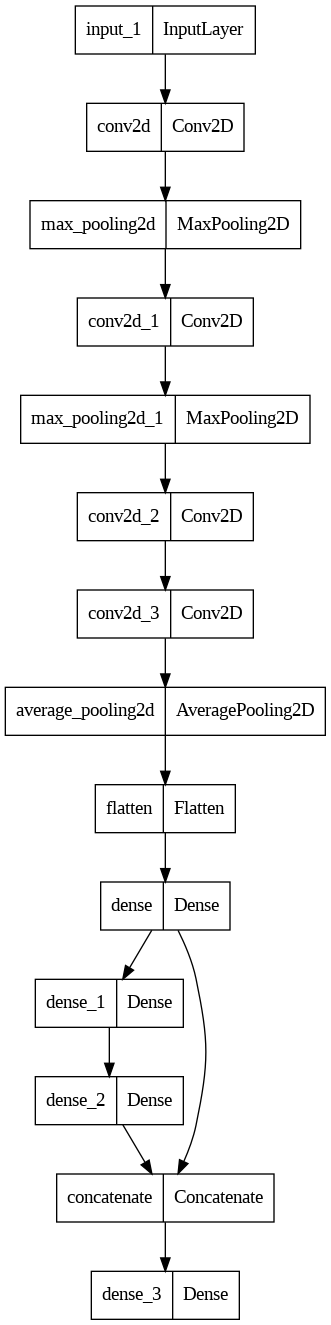

In [ ]:
keras.utils.plot_model(model)

In [ ]:
model.compile(loss=tf.losses.BinaryCrossentropy(),
              optimizer='nadam',
              metrics=['accuracy']
              )
calb = keras.callbacks.ModelCheckpoint('Pnemonia chest x ray.h5' , save_best_only=True)

# **Training the model**

In [ ]:
history = model.fit( data , validation_data=(val) , epochs=10  , callbacks=[calb])

Epoch 1/10
101/101 [==============================] - 53s 355ms/step - loss: 0.5319 - accuracy: 0.7598 - val_loss: 0.5475 - val_accuracy: 0.7500


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/10
101/101 [==============================] - 43s 399ms/step - loss: 0.2905 - accuracy: 0.8756 - val_loss: 0.7571 - val_accuracy: 0.7500
Epoch 3/10
101/101 [==============================] - 41s 386ms/step - loss: 0.1479 - accuracy: 0.9440 - val_loss: 0.6740 - val_accuracy: 0.7500
Epoch 4/10
101/101 [==============================] - 41s 386ms/step - loss: 0.1056 - accuracy: 0.9624 - val_loss: 1.3811 - val_accuracy: 0.5625
Epoch 5/10
101/101 [==============================] - 43s 396ms/step - loss: 0.0809 - accuracy: 0.9672 - val_loss: 0.4794 - val_accuracy: 0.8750
Epoch 6/10
101/101 [==============================] - 41s 376ms/step - loss: 0.0696 - accuracy: 0.9735 - val_loss: 0.2684 - val_accuracy: 0.9375
Epoch 7/10
101/101 [==============================] - 41s 373ms/step - loss: 0.0593 - accuracy: 0.9791 - val_loss: 0.1170 - val_accuracy: 0.9375
Epoch 8/10
101/101 [==============================] - 42s 386ms/step - loss: 0.0540 - accuracy: 0.9797 - val_loss: 0.2082 - val_ac

# **Evaluating our Model**

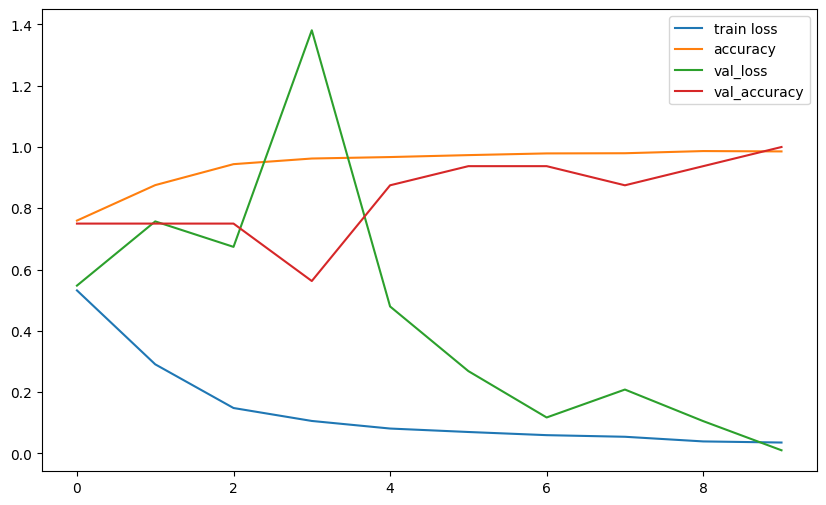

In [ ]:
fig , ax = plt.subplots(figsize=(10 ,6))
ax.plot(history.history['loss'] , label= "train loss")
ax.plot(history.history['accuracy'] , label= "accuracy")
ax.plot(history.history['val_loss'] , label= "val_loss")
ax.plot(history.history['val_accuracy'] , label= "val_accuracy")
ax.legend()

In [ ]:
batch = test.as_numpy_iterator().next()
batch[0]

In [ ]:
model.evaluate(test)

12/12 [==============================] - 4s 127ms/step - loss: 0.9026 - accuracy: 0.8077


[0.902612030506134, 0.807692289352417]

In [ ]:
import matplotlib.pyplot as plt

# **Real Diagnosis**

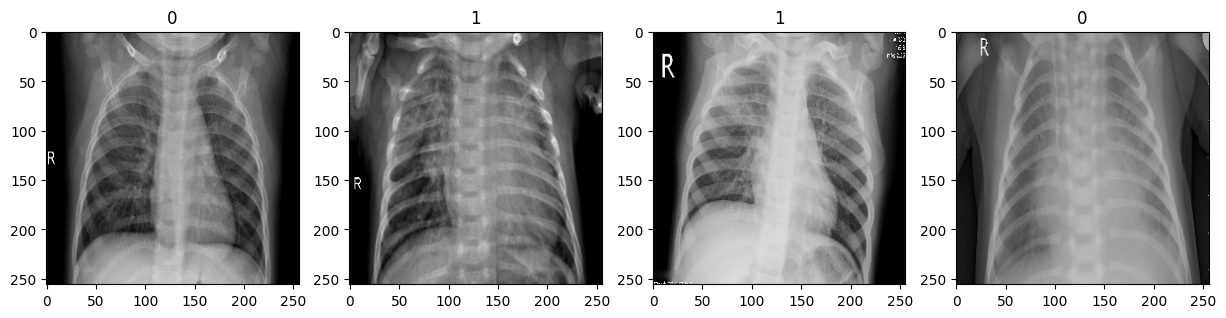

In [ ]:
fig , ax = plt.subplots(ncols=4 ,figsize=(15,15))

for inx , img in enumerate(batch[0][10:14]):
  ax[inx].imshow(img)
  ax[inx].title.set_text(batch3[1][inx])
plt.show()

# **Model Diagnosis**

1/1 [==============================] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


1/1 [==============================] - 0s 30ms/step


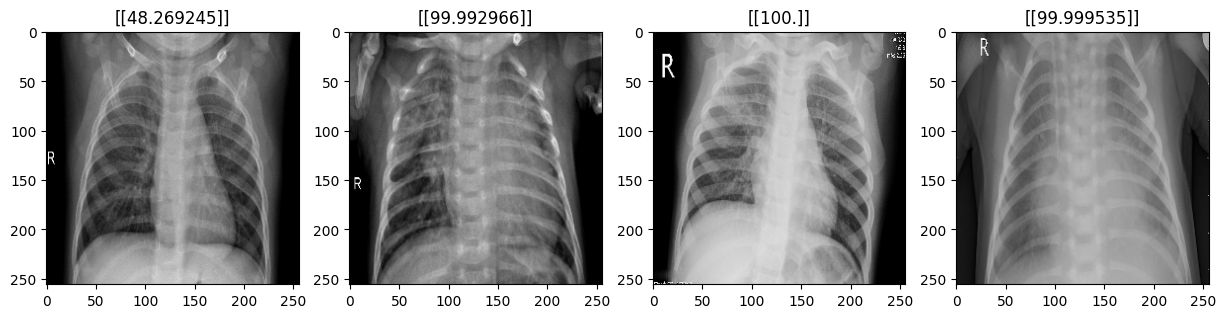

In [ ]:
fig , ax = plt.subplots(ncols=4 ,figsize=(15,15))

for inx , img in enumerate(batch[0][10:14]):
  ax[inx].imshow(img)
  img = np.expand_dims(img , axis=0)
  pre = model.predict(img)
  ax[inx].title.set_text(pre*100)
plt.show()

check my GitHub:
[github.com/GIGAParviz](https://github.com/GIGAParviz)

hope you like it  ;)

